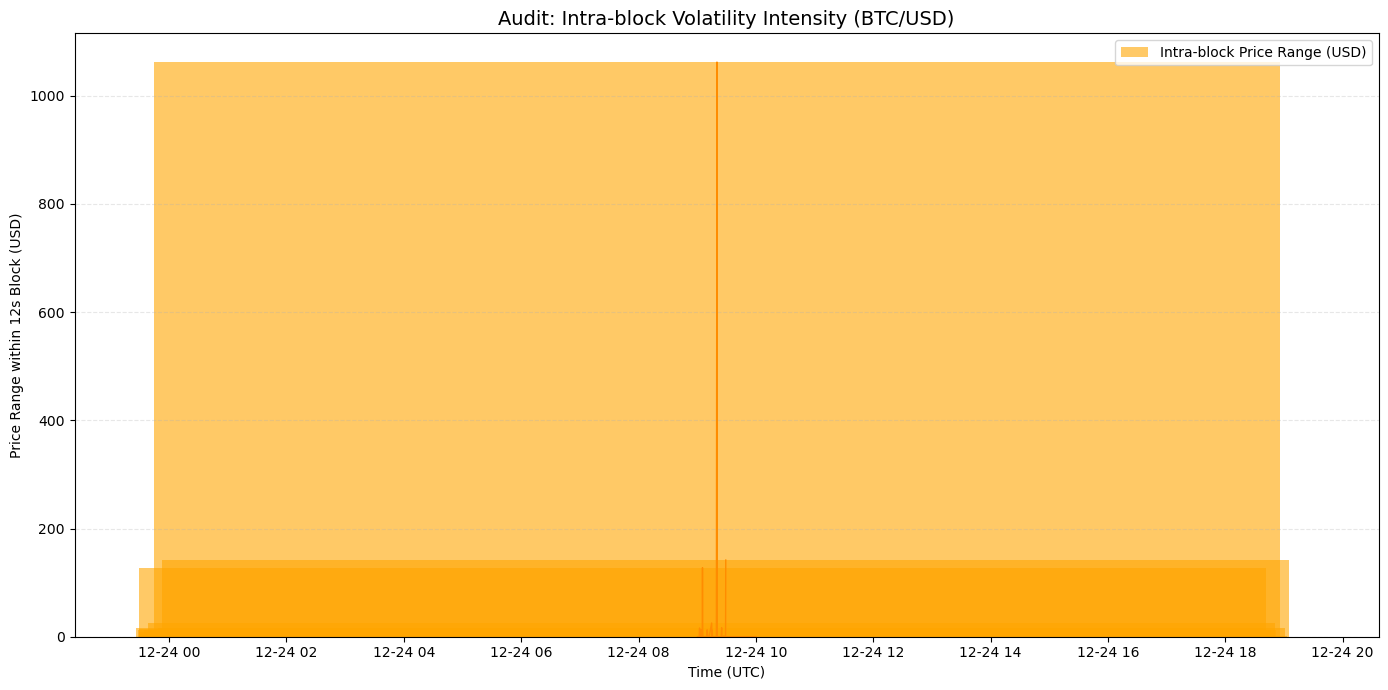

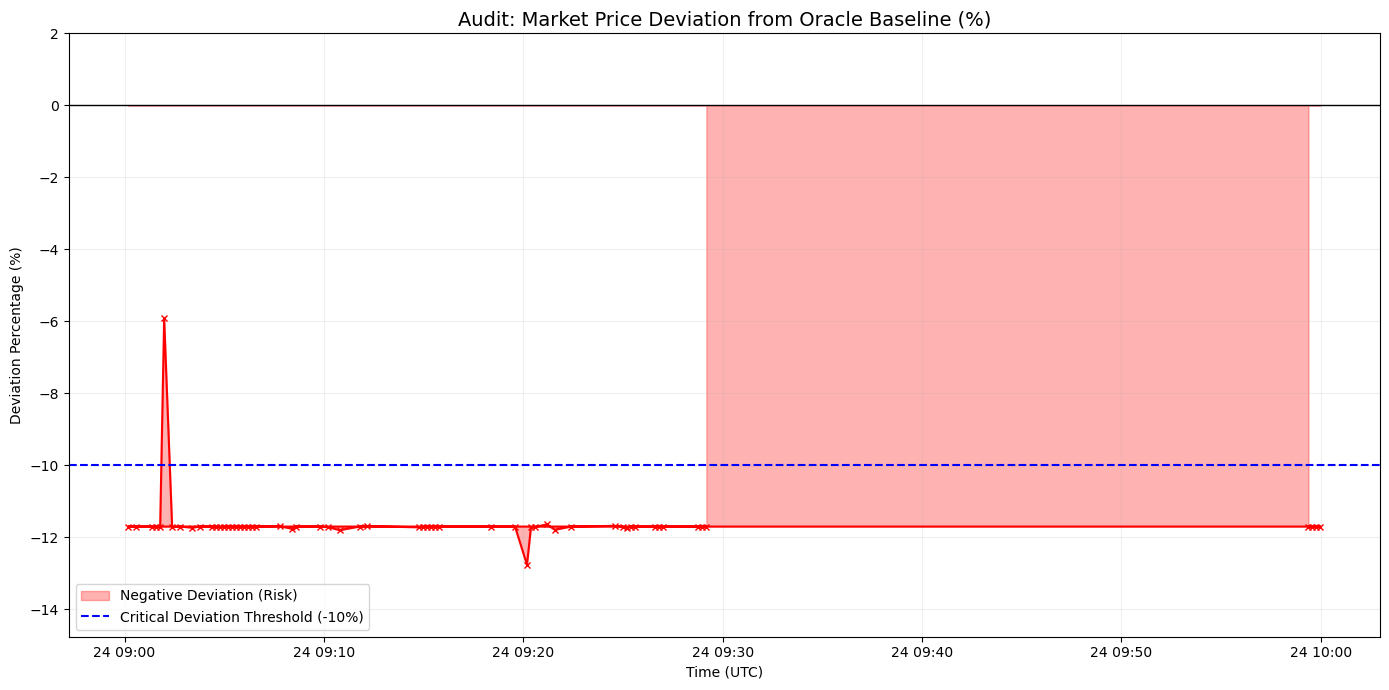

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load Data Source ---
# Updated file name from 'Sheet6.csv' to '03_deviation_audit.csv'
df_summary = pd.read_csv('03_deviation_audit.csv')

# --- 2. Fix Potential Timestamp Truncation ---
# This function handles the "MM:SS.f" format often exported by database tools or Excel
def fix_timestamp(t):
    t = str(t).strip()
    # Check if the string is truncated to minutes and seconds (e.g., "29:11.0")
    if len(t.split(':')) == 2:
        # Assuming the base hour is 09:00 UTC on the audit date
        return f"2025-12-24 09:{t}"
    return f"2025-12-24 {t}"

# Apply fix and convert to datetime objects
df_summary['BLOCK_TIMESTAMP'] = pd.to_datetime(df_summary['BLOCK_TIMESTAMP'].apply(fix_timestamp))

# Ensure data is chronological based on the blockchain height
df_summary = df_summary.sort_values('BLOCK_NUMBER')

# --- 3. Visualization: Intra-block Volatility Intensity ---
# This "Chaos Gauge" measures the absolute price swing (Max - Min) within a single 12-second block.
plt.figure(figsize=(14, 7))
plt.bar(df_summary['BLOCK_TIMESTAMP'], df_summary['PRICE_RANGE'], 
        color='orange', alpha=0.6, label='Intra-block Price Range (USD)')
plt.plot(df_summary['BLOCK_TIMESTAMP'], df_summary['PRICE_RANGE'], 
         color='darkorange', linewidth=1)

plt.title('Audit: Intra-block Volatility Intensity (BTC/USD)', fontsize=14)
plt.xlabel('Time (UTC)')
plt.ylabel('Price Range within 12s Block (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --- 4. Visualization: Market Price Deviation from Oracle ---
# This "Smoking Gun" chart visualizes Basis Risk: when market price is significantly lower than the Oracle index.
plt.figure(figsize=(14, 7))

# Fill the area where deviation creates liquidation risk
plt.fill_between(df_summary['BLOCK_TIMESTAMP'], df_summary['MIN_PRICE_DEVIATION_PCT'], 0, 
                 where=(df_summary['MIN_PRICE_DEVIATION_PCT'] < 0), 
                 color='red', alpha=0.3, label='Negative Deviation (Risk)')

plt.plot(df_summary['BLOCK_TIMESTAMP'], df_summary['MIN_PRICE_DEVIATION_PCT'], 
         color='red', marker='x', markersize=4)

# Plot reference lines
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
# DeFi Stress Test Baseline: Mark the -10% threshold
plt.axhline(y=-10, color='blue', linestyle='--', label='Critical Deviation Threshold (-10%)')

plt.title('Audit: Market Price Deviation from Oracle Baseline (%)', fontsize=14)
plt.xlabel('Time (UTC)')
plt.ylabel('Deviation Percentage (%)')

# Adjust y-axis to focus on negative risk zones
plt.ylim(min(df_summary['MIN_PRICE_DEVIATION_PCT']) - 2, 2)
plt.legend(loc='lower left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()